In [2]:
from google.colab import drive
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

drive.mount('/content/drive')

Mounted at /content/drive


# 1.1 Data Preprocessing

## Display data

In [4]:
# Read metadata
df= pd.read_csv(r"/content/drive/My Drive/HAM10000_metadata.csv")
df.shape

(10015, 7)

In [ ]:
df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [ ]:
# Check datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     10015 non-null  object 
 1   image_id      10015 non-null  object 
 2   dx            10015 non-null  object 
 3   dx_type       10015 non-null  object 
 4   age           9958 non-null   float64
 5   sex           10015 non-null  object 
 6   localization  10015 non-null  object 
dtypes: float64(1), object(6)
memory usage: 547.8+ KB


In [ ]:
# Display the number of unique values
df.nunique()

lesion_id        7470
image_id        10015
dx                  7
dx_type             4
age                18
sex                 3
localization       15
dtype: int64

In [ ]:
# Statistical analysis of numerical value
df.describe()

,age
count,9958.000000
mean,51.863828
std,16.968614
min,0.000000
25%,40.000000
50%,50.000000
75%,65.000000
max,85.000000


## Check missing value

In [ ]:
# Check missing values
df.isnull().sum()

lesion_id        0
image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
dtype: int64

In [5]:
# Fill null with mean in age
df['age'].fillna(int(df['age'].mode()),inplace=True)
df.isnull().sum()

lesion_id       0
image_id        0
dx              0
dx_type         0
age             0
sex             0
localization    0
dtype: int64

## Translate class information

In [6]:
# Add explanation
lesion_type_dict = {
    'nv': 'Melanocytic nevi',
    'mel': 'Melanoma',
    'bkl': 'Benign keratosis-like lesions ',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'
}

df['cell_type'] = df['dx'].map(lesion_type_dict.get) # Explain labels
df['label'] = df['dx'].map(lambda x: 1 if x == 'mel' else 0) # Encode binary labels
df.drop("dx", axis=1, inplace=True)
df.head()

,lesion_id,image_id,dx_type,age,sex,localization,cell_type,label
0,HAM_0000118,ISIC_0027419,histo,80.0,male,scalp,Benign keratosis-like lesions,0
1,HAM_0000118,ISIC_0025030,histo,80.0,male,scalp,Benign keratosis-like lesions,0
2,HAM_0002730,ISIC_0026769,histo,80.0,male,scalp,Benign keratosis-like lesions,0
3,HAM_0002730,ISIC_0025661,histo,80.0,male,scalp,Benign keratosis-like lesions,0
4,HAM_0001466,ISIC_0031633,histo,75.0,male,ear,Benign keratosis-like lesions,0


# 1.2 Exploratory Data Analysis
## Check if label distribution is balanced or not

<Axes: >

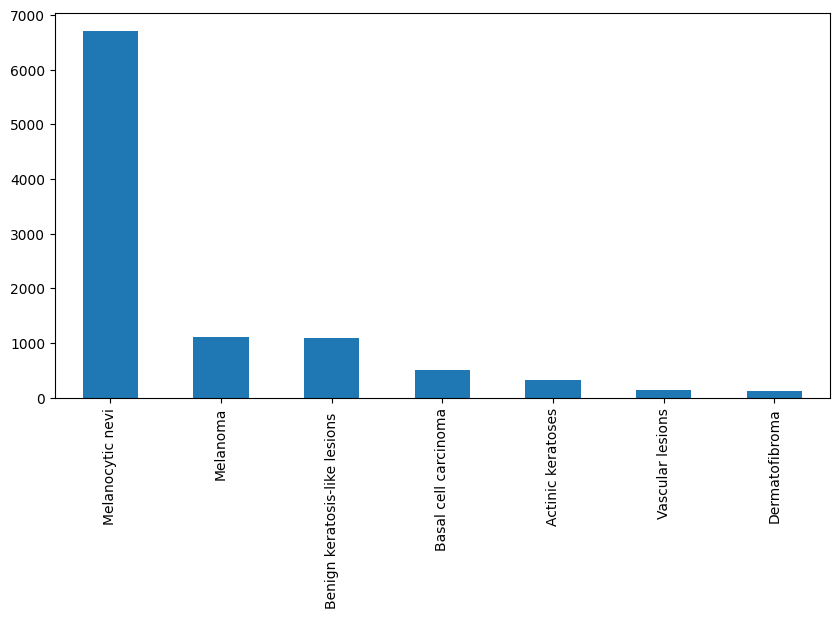

In [6]:
fig, ax1 = plt.subplots(1, 1, figsize= (10, 5))
df['cell_type'].value_counts().plot(kind='bar', ax=ax1)

## Univariate Analysis
- Age

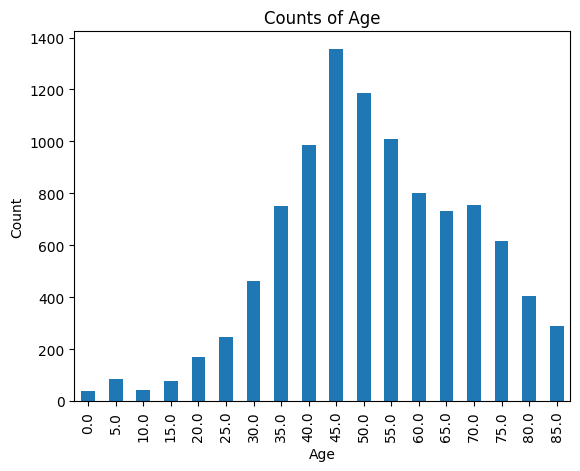

In [ ]:
#df['age'].value_counts().plot(kind='bar')

# Sort the df by 'age' column
sorted_df = df['age'].value_counts().sort_index()

# Create the plot with sorted values on the x-axis
sorted_df.plot(kind='bar')

# Customize plot
plt.title('Counts of Age')
plt.xlabel('Age')
plt.ylabel('Count')

# Show the plot
plt.show()

- Gender

<Axes: >

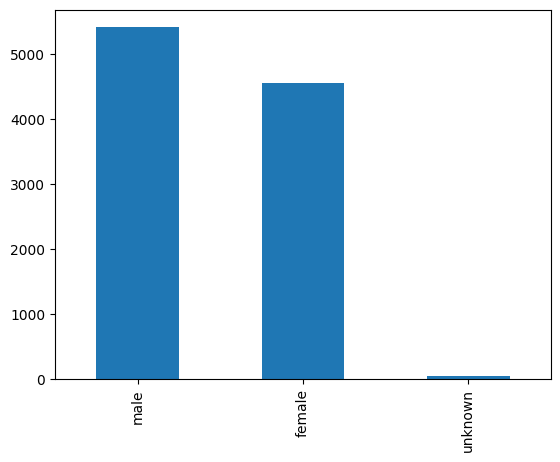

In [ ]:
df['sex'].value_counts().plot(kind='bar')

- Location

<Axes: >

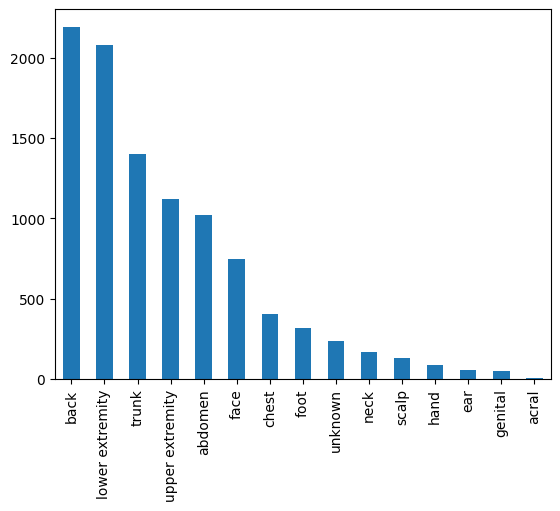

In [ ]:
df['localization'].value_counts().plot(kind='bar')

- diagnosis type


<Axes: >

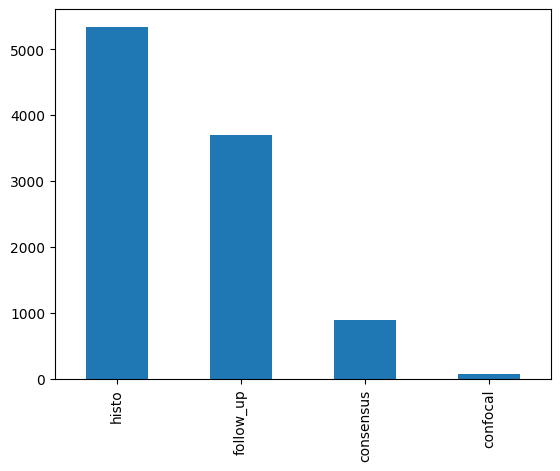

In [ ]:
df['dx_type'].value_counts().plot(kind='bar')

## Bivariate Analysis

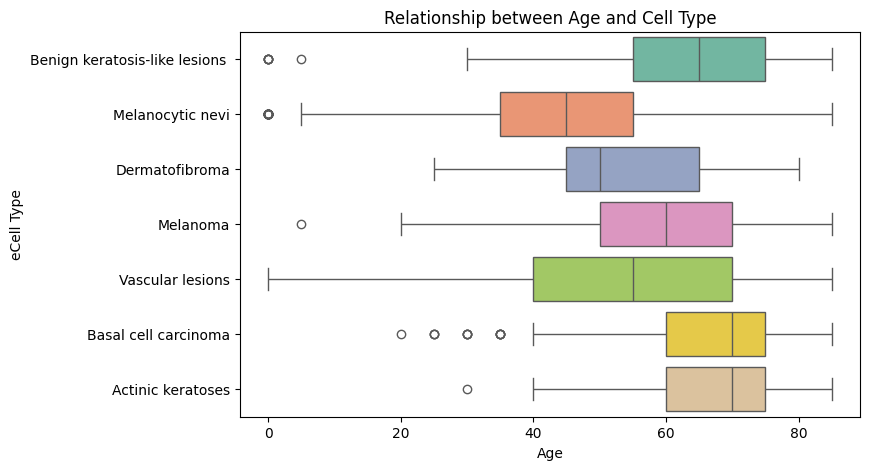

In [ ]:
# age and cell type
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='age', y='cell_type', palette='Set2')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('eCell Type')
plt.title('Relationship between Age and Cell Type')

# Show plot
plt.show()

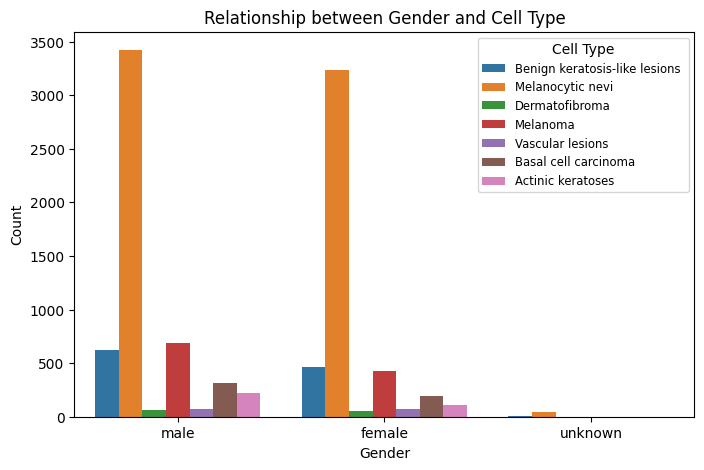

In [ ]:
# sex and cell type
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='sex', hue='cell_type')

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Relationship between Gender and Cell Type')

# Resize legend
plt.legend(title='Cell Type', fontsize='small')

# Show plot
plt.show()

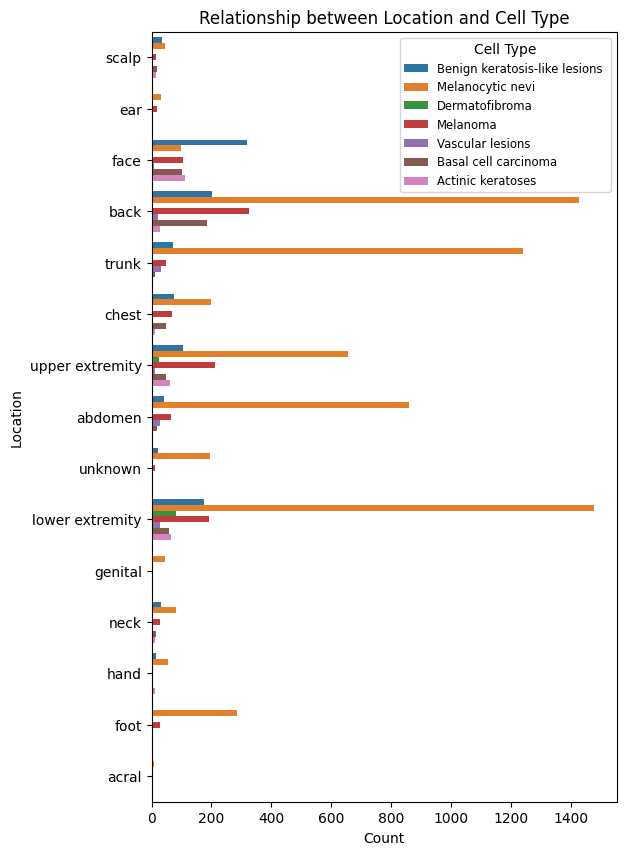

In [ ]:
# location and cell type
plt.figure(figsize=(6, 10))
ax = sns.countplot(data=df, y='localization', hue='cell_type')

# Add labels and title
plt.xlabel('Count')
plt.ylabel('Location')
plt.title('Relationship between Location and Cell Type')

# Resize legend
plt.legend(title='Cell Type', fontsize='small')

# Show plot
plt.show()


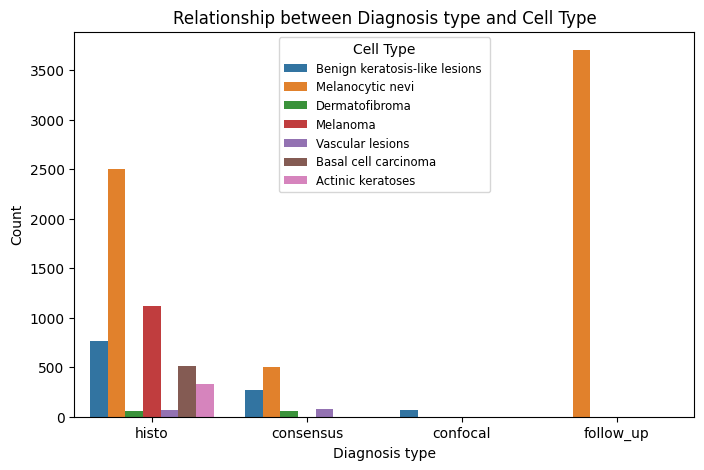

In [ ]:
# diagnosis type and cell type
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='dx_type', hue='cell_type')

# Add labels and title
plt.xlabel('Diagnosis type')
plt.ylabel('Count')
plt.title('Relationship between Diagnosis type and Cell Type')

# Resize legend
plt.legend(title='Cell Type', fontsize='small')

# Show plot
plt.show()

In [ ]:
# Filter the DataFrame where 'label' equals 1 and extract unique values in 'dx_type'
unique = df[df['label'] == 1]['dx_type'].unique()

# Print the unique values
print("Unique values in 'dx_type' when 'label' equals 1:")
print(unique)

Unique values in 'dx_type' when 'label' equals 1:
['histo']


# 1.3 Encoding Data
- option 1 - Label encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [ ]:
df_encoded1 = df.copy()

# sex
# Find mode of 'sex' column excluding 'unknown'
mode_sex = df_encoded1[df_encoded1['sex'] != 'unknown']['sex'].mode()[0]

# Replace 'unknown' with the mode
df_encoded1.loc[df_encoded1['sex'] == 'unknown', 'sex'] = mode_sex

# encode sex male = 1, female = 0
label_encoder = LabelEncoder()
df_encoded1['sex_encoded'] = label_encoder.fit_transform(df_encoded1['sex'])


# dx_type
df_encoded1['dx_type_encoded'] = df_encoded1.dx_type.map({'confocal':0,'consensus':0,'follow_up':0,'histo':1})


# localization
df_encoded1['localization_encoded'] = df_encoded1.localization.map({'scalp':0, 'ear':1, 'face':2, 'neck':3,'back':4, 'trunk':5,
                          'chest':6, 'upper extremity':7, 'abdomen':8, 'lower extremity':9,
                          'genital':10, 'hand':11, 'foot':12, 'acral':13, 'unknown':14})
df_encoded1.head()

,lesion_id,image_id,dx_type,age,sex,localization,cell_type,label,sex_encoded,dx_type_encoded,localization_encoded
0,HAM_0000118,ISIC_0027419,histo,80.0,male,scalp,Benign keratosis-like lesions,0,1,1,0
1,HAM_0000118,ISIC_0025030,histo,80.0,male,scalp,Benign keratosis-like lesions,0,1,1,0
2,HAM_0002730,ISIC_0026769,histo,80.0,male,scalp,Benign keratosis-like lesions,0,1,1,0
3,HAM_0002730,ISIC_0025661,histo,80.0,male,scalp,Benign keratosis-like lesions,0,1,1,0
4,HAM_0001466,ISIC_0031633,histo,75.0,male,ear,Benign keratosis-like lesions,0,1,1,1


In [ ]:
# Select features and target variable
selected_features = ['age', 'sex_encoded', 'dx_type_encoded', 'localization_encoded']

# Prepare data
X1 = df_encoded1[selected_features]
y1 = df_encoded1['label']

- option 2 - One-hot encoding

In [ ]:
df_encoded2 = df.copy()

# sex
df_encoded2 = pd.get_dummies(df_encoded2, columns=['sex'])
# dx_type
df_encoded2['dx_type_encoded'] = df_encoded2.dx_type.map({'confocal':0,'consensus':0,'follow_up':0,'histo':1})

In [ ]:
# check 'localization' with 'label' 0 and 1
grouped_df = df.groupby(['localization', 'label']).size().unstack(fill_value=0)

# Calculate the total count for each 'localization'
grouped_df['total_count'] = grouped_df.sum(axis=1)

# Calculate the percentage of 0 and 1 in 'label' for each 'localization'
grouped_df['percentage_0'] = (grouped_df[0] / grouped_df['total_count']) * 100
grouped_df['percentage_1'] = (grouped_df[1] / grouped_df['total_count']) * 100
grouped_df.reset_index(inplace=True)

sorted_df = grouped_df.sort_values(by='percentage_1', ascending=False)
sorted_df

label,localization,0,1,total_count,percentage_0,percentage_1
4,ear,39,17,56,69.642857,30.357143
14,upper extremity,905,213,1118,80.948122,19.051878
10,neck,139,29,168,82.738095,17.261905
3,chest,339,68,407,83.292383,16.707617
2,back,1868,324,2192,85.218978,14.781022
5,face,641,104,745,86.040268,13.959732
11,scalp,114,14,128,89.062500,10.937500
9,lower extremity,1885,192,2077,90.755898,9.244102
6,foot,291,28,319,91.222571,8.777429
0,abdomen,956,66,1022,93.542074,6.457926


In [ ]:
# Replace genital, acral, hand with safe_loc
df_encoded2['localization'] = df_encoded2['localization'].replace(['hand', 'acral', 'genital'], 'safe_loc')

# Merge unknown	with trunk
df_encoded2['localization'] = df_encoded2['localization'].replace(['unknown'], 'trunk')

# Merge foot with lower extremity
df_encoded2['localization'] = df_encoded2['localization'].replace(['foot'], 'lower extremity')

# Merge chesk with neck
df_encoded2['localization'] = df_encoded2['localization'].replace(['neck'], 'chest')

df_encoded2 = pd.get_dummies(df_encoded2, columns=['localization'])
df_encoded2.head()

,lesion_id,image_id,dx_type,age,cell_type,label,sex_female,sex_male,sex_unknown,dx_type_encoded,localization_abdomen,localization_back,localization_chest,localization_ear,localization_face,localization_lower extremity,localization_safe_loc,localization_scalp,localization_trunk,localization_upper extremity
0,HAM_0000118,ISIC_0027419,histo,80.0,Benign keratosis-like lesions,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
1,HAM_0000118,ISIC_0025030,histo,80.0,Benign keratosis-like lesions,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,HAM_0002730,ISIC_0026769,histo,80.0,Benign keratosis-like lesions,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,HAM_0002730,ISIC_0025661,histo,80.0,Benign keratosis-like lesions,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
4,HAM_0001466,ISIC_0031633,histo,75.0,Benign keratosis-like lesions,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0


In [ ]:
# Prepare data
X = df_encoded2.iloc[:,3:]
X.drop(columns=['cell_type','label'], inplace=True)

y = df_encoded2['label']

# 1.4 Feature Importance

## filter - Chi-square test, Mutual information

In [ ]:
from sklearn.feature_selection import chi2, mutual_info_classif
from sklearn.feature_selection import SelectKBest

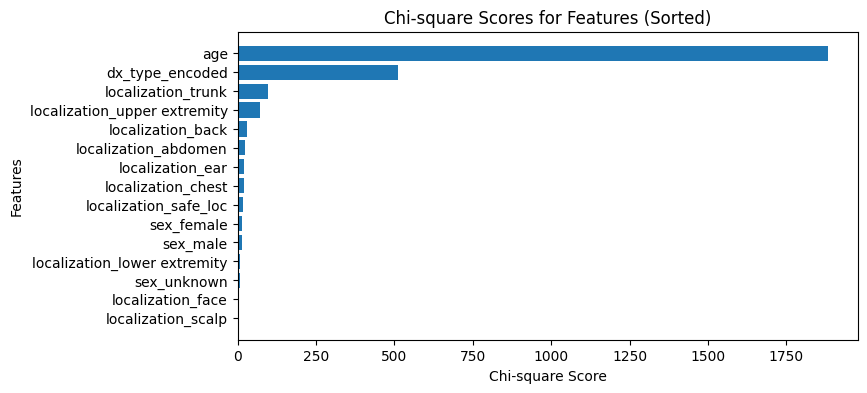

In [ ]:
# Chi-square test for feature selection
chi2_selector = SelectKBest(score_func=chi2, k=4)
X_chi2_selected = chi2_selector.fit_transform(X, y)
chi2_scores = chi2_selector.scores_

# Sort Chi-square scores and feature names
sorted_indices_chi2 = np.argsort(chi2_scores)[::-1]
sorted_chi2_scores = chi2_scores[sorted_indices_chi2]
sorted_features_chi2 = [X.columns[i] for i in sorted_indices_chi2]

# Plot Chi-square scores
plt.figure(figsize=(8, 4))
plt.barh(sorted_features_chi2, sorted_chi2_scores)
plt.xlabel('Chi-square Score')
plt.ylabel('Features')
plt.title('Chi-square Scores for Features (Sorted)')
plt.gca().invert_yaxis()  # Invert y-axis to display highest score on top
plt.show()

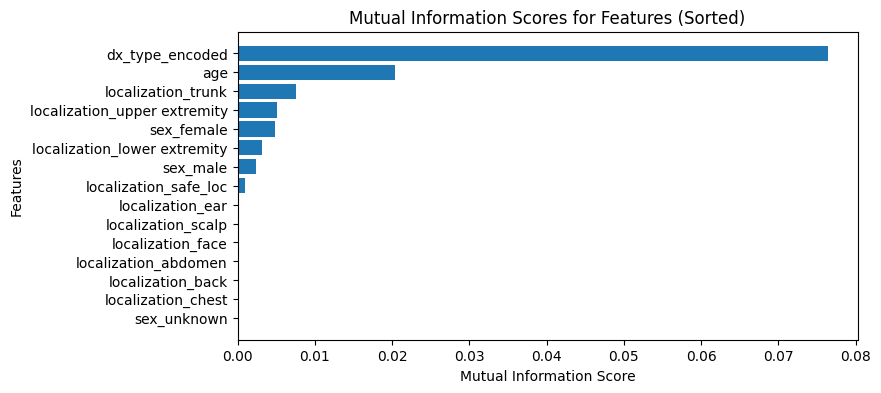

In [ ]:
# Mutual information for feature selection
mutual_info_selector = SelectKBest(score_func=mutual_info_classif, k=4)
X_mutual_info_selected = mutual_info_selector.fit_transform(X, y)
mutual_info_scores = mutual_info_selector.scores_

# Sort Mutual information scores and feature names
sorted_indices_mutual_info = np.argsort(mutual_info_scores)[::-1]
sorted_mutual_info_scores = mutual_info_scores[sorted_indices_mutual_info]
sorted_features_mutual_info = [X.columns[i] for i in sorted_indices_mutual_info]

# Plot Mutual information scores
plt.figure(figsize=(8, 4))
plt.barh(sorted_features_mutual_info, sorted_mutual_info_scores)
plt.xlabel('Mutual Information Score')
plt.ylabel('Features')
plt.title('Mutual Information Scores for Features (Sorted)')
plt.gca().invert_yaxis()  # Invert y-axis to display highest score on top
plt.show()

## embeded method - random forest

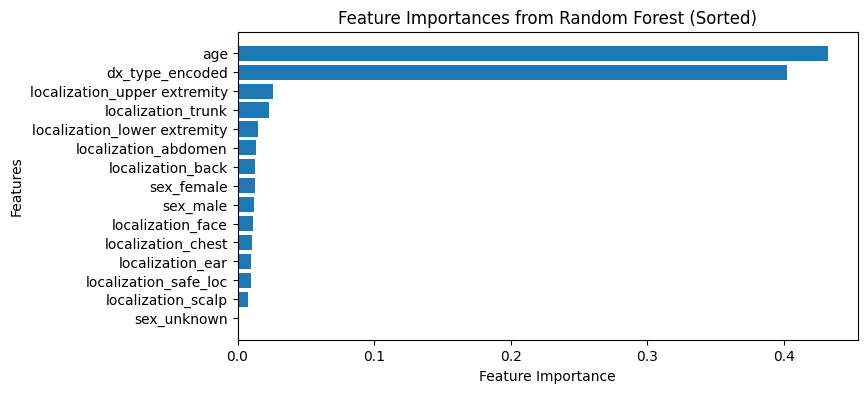

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X, y)

# Extract feature importances
feature_importances = clf.feature_importances_

# Sort feature importances
sorted_indices_rf = np.argsort(feature_importances)[::-1]
sorted_feature_importances = feature_importances[sorted_indices_rf]
sorted_features = [X.columns[i] for i in sorted_indices_rf]

# Plot sorted feature importances
plt.figure(figsize=(8, 4))
plt.barh(sorted_features, sorted_feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importances from Random Forest (Sorted)')
plt.gca().invert_yaxis()  # Invert y-axis to display highest score on top
plt.show()

#1.5 Align image data with metadata

In [ ]:
import os
from glob import glob

data_dir = '../input/skin-cancer-mnist-ham10000'
all_image_path = glob(os.path.join(data_dir, '*', '*.jpg'))
imageid_path_dict = {os.path.splitext(os.path.basename(x))[0]: x for x in all_image_path}

In [ ]:
df['path'] = df['image_id'].map(imageid_path_dict.get)
df.head()

,lesion_id,image_id,dx_type,age,sex,localization,cell_type,label,path
0,HAM_0000118,ISIC_0027419,histo,80.0,male,scalp,Benign keratosis-like lesions,0,None
1,HAM_0000118,ISIC_0025030,histo,80.0,male,scalp,Benign keratosis-like lesions,0,None
2,HAM_0002730,ISIC_0026769,histo,80.0,male,scalp,Benign keratosis-like lesions,0,None
3,HAM_0002730,ISIC_0025661,histo,80.0,male,scalp,Benign keratosis-like lesions,0,None
4,HAM_0001466,ISIC_0031633,histo,75.0,male,ear,Benign keratosis-like lesions,0,None
